# Задание 1

In [3]:
import numpy as np
import scipy as sp
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
%matplotlib inline

In [3]:
data = pd.read_csv('weights_heights.csv', index_col='Index')

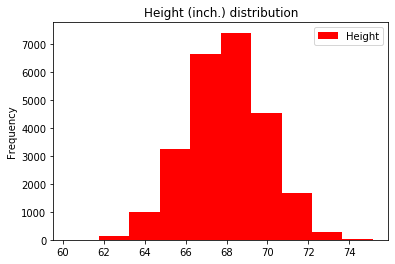

In [4]:
data.plot(y='Height', kind='hist', 
           color='red',  title='Height (inch.) distribution')

In [5]:
first_five = data.head()
first_five

,Height,Weight
Index,,
1,65.78331,112.9925
2,71.51521,136.4873
3,69.39874,153.0269
4,68.21660,142.3354
5,67.78781,144.2971


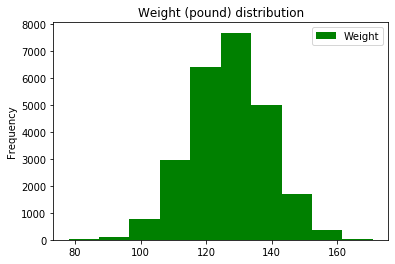

In [6]:
data.plot(y='Weight', kind='hist', color='green', title='Weight (pound) distribution')

In [7]:
def make_bmi(height_inch, weight_pound):
    METER_TO_INCH, KILO_TO_POUND = 39.37, 2.20462
    return (weight_pound / KILO_TO_POUND) / \
           (height_inch / METER_TO_INCH) ** 2

In [8]:
data['BMI'] = data.apply(lambda row: make_bmi(row['Height'], row['Weight']), axis=1)

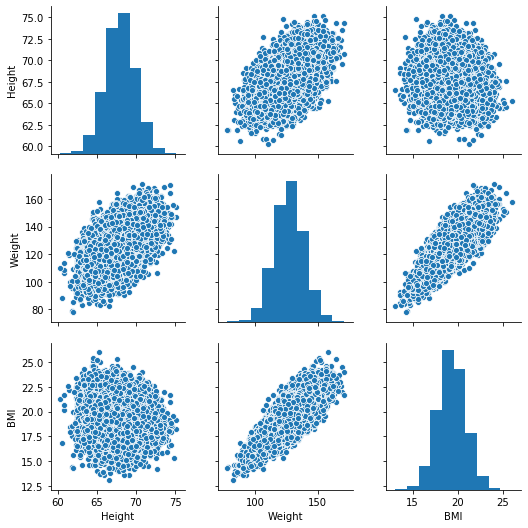

In [9]:
sns.pairplot(data)

In [10]:
def weight_category(weight):
    if weight < 120:
        return 1
    elif weight > 150:
        return 3
    else:
        return 2


data['Weight_category'] = data['Weight'].apply(weight_category)

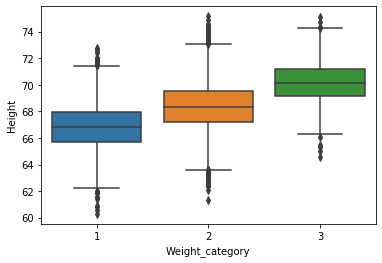

In [11]:
sns.boxplot(y=data['Height'], x=data['Weight_category'])

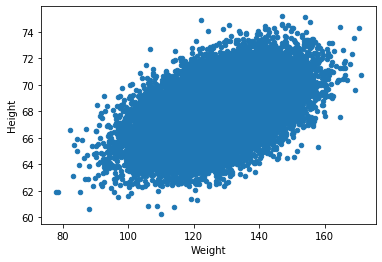

In [12]:
data.plot(y='Height', x='Weight', kind='scatter')

# Задание 2

In [13]:
def error(w0, w1, data):
    tmp = data.apply(lambda row: (row['Height'] - (w0 + w1*row['Weight']))**2, axis=1)
    return sum(tmp)

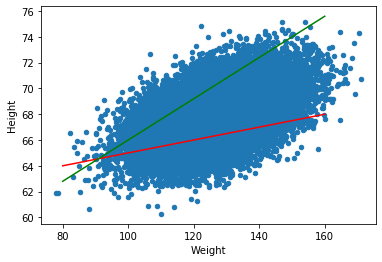

In [14]:
data.plot(y='Height', x='Weight', kind='scatter')
x = np.linspace(80, 160, 5)
plt.plot(x, 60 + 0.05*x, '-r',  x, 50 + 0.16*x, '-g')
plt.show()

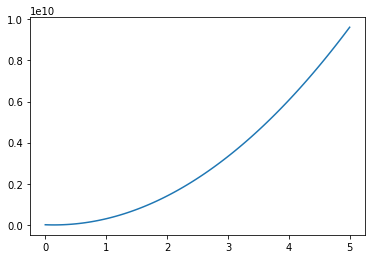

In [15]:
x = np.linspace(0, 5, 100)
plt.plot(x, error(50, x, data))
plt.show()

In [16]:
def error1(x):
    return error(50, x, data)

res = sp.optimize.minimize_scalar(error1)

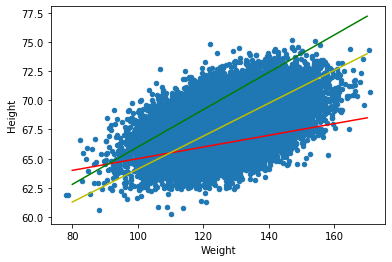

In [17]:
w_opt = res['x']

data.plot(y='Height', x='Weight', kind='scatter')
x = np.linspace(80, 170, 5)
plt.plot(x, 60 + 0.05*x, '-r',  x, 50 + 0.16*x, '-g', x, 50 + w_opt*x, '-y')
plt.show()

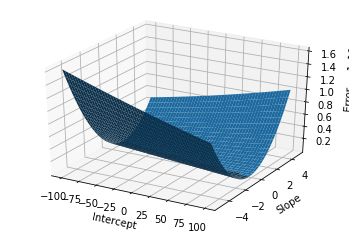

In [18]:
fig = plt.figure()
ax = fig.gca(projection='3d') # get current axis

# Создаем массивы NumPy с координатами точек по осям X и У. 
# Используем метод meshgrid, при котором по векторам координат 
# создается матрица координат. Задаем нужную функцию Z(x, y).
X = np.arange(-100, 100, 1)
Y = np.arange(-5, 5, 0.25)
X, Y = np.meshgrid(X, Y)
Z = error(X, Y, data)

# Наконец, используем метод *plot_surface* объекта 
# типа Axes3DSubplot. Также подписываем оси.
surf = ax.plot_surface(X, Y, Z)
ax.set_xlabel('Intercept')
ax.set_ylabel('Slope')
ax.set_zlabel('Error')
plt.show()

In [19]:
def error2(x):
    return error(x[0], x[1], data)

sp.optimize.minimize(error2, (0, 0), method='L-BFGS-B', bounds=((-100, 100), (-5, 5)))

      fun: 67545.28708578378
 hess_inv: <2x2 LbfgsInvHessProduct with dtype=float64>
      jac: array([-0.01309672,  0.19936124])
  message: b'CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH'
     nfev: 51
      nit: 12
   status: 0
  success: True
        x: array([57.57175901,  0.08200662])

In [1]:
w0_opt = 57.57175901
w1_opt = 0.08200662

data.plot(y='Height', x='Weight', kind='scatter')
x = np.linspace(80, 170, 5)
plt.plot(x, w0_opt + w1_opt*x, 'y')
plt.show()

NameError: name 'data' is not defined

In [12]:
A = np.matrix([[1, 0, 0, 0, 0],
              [1000, 1, 0, 0, 0],
              [0, 1000, 1, 0, 0],
              [0, 0, 1000, 1, 0],
              [0, 0, 0, 1000, 1]])
A.H*A

matrix([[1000001,    1000,       0,       0,       0],
        [   1000, 1000001,    1000,       0,       0],
        [      0,    1000, 1000001,    1000,       0],
        [      0,       0,    1000, 1000001,    1000],
        [      0,       0,       0,    1000,       1]])